<a href="https://colab.research.google.com/github/Manu-Sanchez/Learning/blob/ai%2Fbasic-gan/MNIST_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as func
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.utils import make_grid

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

##MNIST Data Import

In [3]:
MNIST_train_data = datasets.MNIST("../data", train=True, download=True, transform=transforms.ToTensor())
MNIST_test_data = datasets.MNIST("../data", train=False, download=True, transform=transforms.ToTensor())

100%|██████████| 9912422/9912422 [00:00<00:00, 113516060.56it/s]


Extracting ../data/MNIST/raw/train-images-idx3-ubyte.gz to ../data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 33015997.23it/s]


Extracting ../data/MNIST/raw/train-labels-idx1-ubyte.gz to ../data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 31533768.00it/s]


Extracting ../data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 14206210.86it/s]


Extracting ../data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/MNIST/raw



In [10]:
print(
    f"Type of the items: {type(MNIST_train_data[0]).__name__}\n" + \
    f"Number elements per item: {len(MNIST_train_data[0])}\n" + \
    f"Type of the first item: {type(MNIST_train_data[0][0]).__name__}\n" + \
    f"Type of the second item: {type(MNIST_train_data[0][1]).__name__}"
)

Type of the items: tuple
Number elements per item: 2
Type of the first item: Tensor
Type of the second item: int


Image label: 5


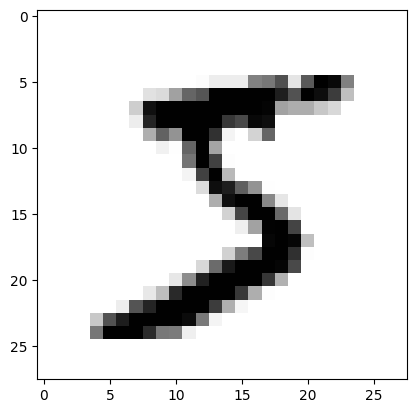

In [23]:
img, label = MNIST_train_data[0]
print(f"Image label: {label}")
plt.imshow(img.permute(1,2,0), cmap="gist_yarg")
plt.show()

In [25]:
train_loader = DataLoader(MNIST_train_data, batch_size=10, shuffle=True)
test_loader = DataLoader(MNIST_test_data, batch_size=10, shuffle=False)

In [40]:
class ConvolutionalNetwork(nn.Module):

  def __init__(self):
    super().__init__()

    self.conv1 = nn.Conv2d(1, 6, 3, 1)
    self.conv2 = nn.Conv2d(6, 16, 3, 1)
    self.fc1 = nn.Linear(16 * 5 * 5, 120)
    self.fc2 = nn.Linear(120, 84)
    self.fc3 = nn.Linear(84, 10)


  def forward(self, x):

    x = func.relu(self.conv1(x))
    x = func.max_pool2d(x, 2, 2)
    x = func.relu(self.conv2(x))
    x = func.max_pool2d(x, 2, 2)
    x = x.reshape(-1, 16*5*5)
    x = func.relu(self.fc1(x))
    x = func.relu(self.fc2(x))
    x = self.fc3(x)

    return func.log_softmax(x, dim=1)

model = ConvolutionalNetwork()
model

ConvolutionalNetwork(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [41]:
criterion = nn.CrossEntropyLoss()
optim = torch.optim.Adam(model.parameters(), lr=1e-3)

In [42]:
for epoch in range(2):
  for batch_idx, (x_tr, y_tr) in enumerate(train_loader):
    y_pred = model(x_tr)
    loss = criterion(y_pred, y_tr)

    optim.zero_grad()
    loss.backward()
    optim.step()

    if batch_idx%200 == 0:
      print(f"Epoch: {epoch} Batch: {batch_idx} Loss: {loss}")


Epoch: 0 Batch: 0 Loss: 2.3389840126037598
Epoch: 0 Batch: 200 Loss: 0.7607985138893127
Epoch: 0 Batch: 400 Loss: 0.830868124961853
Epoch: 0 Batch: 600 Loss: 0.27391937375068665
Epoch: 0 Batch: 800 Loss: 0.2225637137889862
Epoch: 0 Batch: 1000 Loss: 0.15667544305324554
Epoch: 0 Batch: 1200 Loss: 0.01652400568127632
Epoch: 0 Batch: 1400 Loss: 0.07183830440044403
Epoch: 0 Batch: 1600 Loss: 0.030810732394456863
Epoch: 0 Batch: 1800 Loss: 0.0126910749822855
Epoch: 0 Batch: 2000 Loss: 0.012544956989586353
Epoch: 0 Batch: 2200 Loss: 0.02724350057542324
Epoch: 0 Batch: 2400 Loss: 0.004837325308471918
Epoch: 0 Batch: 2600 Loss: 0.017813023179769516
Epoch: 0 Batch: 2800 Loss: 0.008123624138534069
Epoch: 0 Batch: 3000 Loss: 0.014751476235687733
Epoch: 0 Batch: 3200 Loss: 0.21633191406726837
Epoch: 0 Batch: 3400 Loss: 0.02235710620880127
Epoch: 0 Batch: 3600 Loss: 0.23684179782867432
Epoch: 0 Batch: 3800 Loss: 0.004963327664881945
Epoch: 0 Batch: 4000 Loss: 0.10501327365636826
Epoch: 0 Batch: 420